In [1]:
def cmpr_feature_vect(feature_vector1,feature_vector2):
    
    dist = (abs(feature_vector1**2 - feature_vector2**2))**(0.5)

    for idx, val in enumerate(dist):
        if np.isnan(val):
            dist[idx] = 0

    dist = np.sum(dist)

    return dist

In [2]:
from scipy.io import loadmat
import os

dataDir = "/home/dunga/Desktop/AutoSIGN_Related_Stuff/test_train/mat_files_MYCT/"
mats = []
strings = []
for file in os.listdir( dataDir ) :
    strings.append(str(file))
    mats.append( loadmat( dataDir+file ) )
    
    
from sets import Set

string_set = Set()

for string in strings:
    #print(string)
    string_set.add(string)

/home/dunga/anaconda3/envs/AutoSIGN/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: the sets module is deprecated
  if sys.path[0] == '':


In [3]:
from scipy.io import loadmat
import numpy as np

real_mat = np.zeros((119,15,2048))
forg_mat = np.zeros((119,15,2048))

for index in range(2,119):
    
    str_real = 'real'
    str_forg = 'forg'

    name_string = '{}_{}.mat'
    real_name = name_string.format(str_real,index)
    forg_name = name_string.format(str_forg,index)
    
    if real_name in string_set:
        features_real = loadmat(dataDir+real_name)['features']
        features_forg = loadmat(dataDir+forg_name)['features']
        
        real_mat[index] = features_real
        forg_mat[index] = features_forg

In [4]:
empty_array = np.zeros((1,2048))

distance_forg = []

for index in range(2,119):   
    if (real_mat[index][1] != empty_array).any():
        print(index)
        for index_2 in range(1,15):
            for index_3 in range(1,15):
                    dist = cmpr_feature_vect(forg_mat[index][index_3],real_mat[index][index_2])
                    distance_forg.append(dist)

2
3
5
8
10
13
14
17
18
19
20
21
23
24
26
27
29
31
32
33
35
36
37
40
44
45
46
47
48
49
50
52
54
55
57
58
60
62
63
66
67
68
72
73
74
75
76
77
78
79
80
81
87
89
92
93
96
97
98
99
100
102
105
107
108
109
111
112
113
114
115
116
117
118


In [5]:
distance_same = []

for index in range(2,119):
    if (real_mat[index][1] != empty_array).any():
        print(index)
        for index_2 in range(1,15):
            for index_3 in range(1,15):
                if (index_2!=index_3):
                    dist = cmpr_feature_vect(real_mat[index][index_3],real_mat[index][index_2])
                    distance_same.append(dist)

2
3
5
8
10
13
14
17
18
19
20
21
23
24
26
27
29
31
32
33
35
36
37
40
44
45
46
47
48
49
50
52
54
55
57
58
60
62
63
66
67
68
72
73
74
75
76
77
78
79
80
81
87
89
92
93
96
97
98
99
100
102
105
107
108
109
111
112
113
114
115
116
117
118


In [6]:
distance_diff = []

for index in range(2,119):
    if (real_mat[index][1] != empty_array).any():
        print(index)
        for index_2 in range(2,119):
            if (real_mat[index_2][1] != empty_array).any():
                if (index_2!=index):
                    num = np.random.randint(1,14,2)
                    dist = cmpr_feature_vect(real_mat[index][num[0]],real_mat[index_2][num[1]])
                    distance_diff.append(dist)

2
3
5
8
10
13
14
17
18
19
20
21
23
24
26
27
29
31
32
33
35
36
37
40
44
45
46
47
48
49
50
52
54
55
57
58
60
62
63
66
67
68
72
73
74
75
76
77
78
79
80
81
87
89
92
93
96
97
98
99
100
102
105
107
108
109
111
112
113
114
115
116
117
118


In [11]:
np.shape(distance_same)
dist_same = np.array(distance_same)

print("Distance Same All")
print(dist_same.max())
print(dist_same.min())
dist_same_mean = dist_same.mean()
print(dist_same_mean)
print(dist_same.std())

distance_same_above = []
distance_same_below = []

for distance in dist_same:
    if(distance>dist_same_mean):
        distance_same_above.append(distance)
    else:
        distance_same_below.append(distance)
        

dist_same_above = np.array(distance_same_above)
dist_same_below = np.array(distance_same_below)

print("Distance Same Above")
print(dist_same_above.max())
print(dist_same_above.min())
print(dist_same_above.mean())
print(dist_same_above.std())

print("Distance Same Below")
print(dist_same_below.max())
print(dist_same_below.min())
print(dist_same_below.mean())
print(dist_same_below.std())

Distance Same All
1426.90957567
0.0
840.915104036
129.256367933
Distance Same Above
1426.90957567
840.920625045
947.8961641
86.4855183485
Distance Same Below
840.88225959
0.0
743.582364193
72.2222371668


In [12]:
np.shape(distance_forg)
dist_forg = np.array(distance_forg)

print("Distance Forg All")
print(dist_forg.max())
print(dist_forg.min())
dist_forg_mean = dist_forg.mean()
print(dist_forg_mean)
print(dist_forg.std())

distance_forg_above = []
distance_forg_below = []

for distance in dist_forg:
    if(distance>dist_forg_mean):
        distance_forg_above.append(distance)
    else:
        distance_forg_below.append(distance)
        

dist_forg_above = np.array(distance_forg_above)
dist_forg_below = np.array(distance_forg_below)

print("Distance Forg Above")
print(dist_forg_above.max())
print(dist_forg_above.min())
print(dist_forg_above.mean())
print(dist_forg_above.std())

print("Distance Forg Below")
print(dist_forg_below.max())
print(dist_forg_below.min())
print(dist_forg_below.mean())
print(dist_forg_below.std())

Distance Forg All
1787.21085034
666.679075577
1087.20850121
160.449404421
Distance Forg Above
1787.21085034
1087.21719072
1223.94527391
109.89783847
Distance Forg Below
1087.19862074
666.679075577
966.315999908
81.740123334


In [13]:
np.shape(distance_diff)
dist_diff = np.array(distance_diff)
print("Distance Diff All")
print(dist_diff.max())
print(dist_diff.min())
dist_diff_mean = dist_diff.mean()
print(dist_diff_mean)
print(dist_diff.std())

distance_diff_above = []
distance_diff_below = []

for distance in dist_diff:
    if(distance>dist_diff_mean):
        distance_diff_above.append(distance)
    else:
        distance_diff_below.append(distance)
        

dist_diff_above = np.array(distance_diff_above)
dist_diff_below = np.array(distance_diff_below)

print("Distance Diff Above")
print(dist_diff_above.max())
print(dist_diff_above.min())
print(dist_diff_above.mean())
print(dist_diff_above.std())

print("Distance Diff Below")
print(dist_diff_below.max())
print(dist_diff_below.min())
print(dist_diff_below.mean())
print(dist_diff_below.std())

Distance Diff All
1929.15578488
882.399818744
1311.58802002
169.62139505
Distance Diff Above
1929.15578488
1311.61470946
1454.45233328
118.39955787
Distance Diff Below
1311.52048809
882.399818744
1184.89137617
87.7630224306


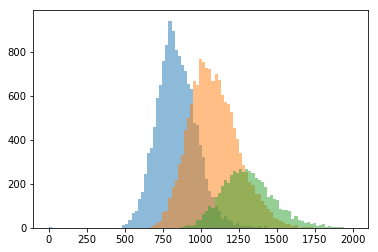

In [14]:
import numpy
import matplotlib.pyplot as plt
import plotly.plotly as py

histogram=plt.figure()

bins = numpy.linspace(0, 2000, 100)

plt.hist(dist_same, bins, alpha=0.5)
plt.hist(dist_forg, bins, alpha=0.5)
plt.hist(dist_diff, bins, alpha=0.5)
plt.show()